In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df =   pd.read_csv(
    "mmlu_phi4mini_w_fallback_if_unknown.tsv",
    sep="\t",
    header=0, 
    escapechar="\\",
)

df

,src,answer,options,category,question,cot_content,question_id,answer_index,total_tokens,meta_cluster,base_cluster,entropy_ans_correct_phi3,entropy_value_phi3,entropy_ans_phi3
0,ori_mmlu-jurisprudence,C,['There is no distinction between the two form...,law,Which of the following criticisms of Llewellyn...,NaN,1286,2,81,Legal Interpretation,Legal Theory Interpretations,True,0.680184,3
1,ori_mmlu-international_law,E,"['Article 19', 'Article 11', 'Article 12', 'Ar...",law,Which of the following articles are not qualif...,NaN,1293,4,38,Legal Interpretation,Constitutional Law,False,1.458612,0
2,ori_mmlu-management,D,"['Work delegation', 'Workload balancing', 'Wor...",business,As what is ensuring that one individual does n...,NaN,83,3,49,Economics & Finance MCQs,Business & Marketing Queries,False,1.253772,1
3,stemez-Business,J,"['$308.25', '$142.75', '$199.99', '$225.85', '...",business,Margaret Denault recently rented a truck to dr...,NaN,94,9,118,Economics & Finance MCQs,Business Finance Questions,False,3.519492,0
4,stemez-Business,I,"['$60,000', '$43,200', '$1,794', '$25,000', '$...",business,The tax rate in the town of Centerville is 11(...,NaN,104,8,102,Economics & Finance MCQs,Business Finance Questions,False,2.177856,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,ori_mmlu-high_school_macroeconomics,F,['Higher interest rates that result from borro...,economics,"The ""crowding-out"" effect refers to which of t...",NaN,7681,5,150,Economics & Finance MCQs,Economic Concepts & Policies,True,0.549616,6
12028,ori_mmlu-high_school_macroeconomics,A,['Lower reserve requirements; lower the discou...,economics,Which of the following lists contains only Fed...,NaN,7683,0,124,Economics & Finance MCQs,Economic Concepts & Policies,True,0.885646,1
12029,ori_mmlu-high_school_macroeconomics,I,['The productivity of labor in country X is 75...,economics,Output in country X is 30000 units and there a...,NaN,7684,8,206,Economics & Finance MCQs,Economic Concepts & Policies,False,2.390148,2
12030,ori_mmlu-high_school_macroeconomics,B,"['an increase in net exports', 'a decrease in ...",economics,A use of easy money (expansionary) policy by t...,NaN,7685,1,58,Economics & Finance MCQs,Economic Concepts & Policies,False,1.211265,0


In [5]:
option_ids = [str(i + 1) for i in range(20)]
# 0 is a special exception for "do not know"
option_ids_w_fallback = option_ids + ["0"]

def validate_mmlu_answer(answer: str | int):
    return str(answer) in option_ids_w_fallback


def keep_only_valid_and_known_answers(df, column_name):
    return df[df[column_name].isin(option_ids)]

In [6]:
df = keep_only_valid_and_known_answers(df,'entropy_ans_phi3')
df

,src,answer,options,category,question,cot_content,question_id,answer_index,total_tokens,meta_cluster,base_cluster,entropy_ans_correct_phi3,entropy_value_phi3,entropy_ans_phi3
0,ori_mmlu-jurisprudence,C,['There is no distinction between the two form...,law,Which of the following criticisms of Llewellyn...,NaN,1286,2,81,Legal Interpretation,Legal Theory Interpretations,True,0.680184,3
2,ori_mmlu-management,D,"['Work delegation', 'Workload balancing', 'Wor...",business,As what is ensuring that one individual does n...,NaN,83,3,49,Economics & Finance MCQs,Business & Marketing Queries,False,1.253772,1
5,theoremQA-Finance,I,"['0.0', '-0.75', '-2.5', '-3.0', '2.5', '-2.0'...",business,Suppose the demand curve for oPads is given by...,NaN,139,8,74,Economics & Finance MCQs,Finance Questions,False,2.361159,3
6,stemez-Business,I,"['500%', '700%', '646%', '65%', '60%', '800%',...",business,What percent of .65% is .42%?,NaN,143,8,40,Economics & Finance MCQs,Business Finance Questions,True,1.059735,9
7,stemez-Business,D,"['$262.15', '$150.25', '$475.00', '$294.50', '...",business,John Wilson retired at age 62 with average yea...,NaN,177,3,82,Economics & Finance MCQs,Business Finance Questions,False,0.996808,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026,ori_mmlu-high_school_macroeconomics,D,['more effective in X because the policy will ...,economics,Economy X is an open economy with flexible exc...,NaN,7680,3,83,Economics & Finance MCQs,Economic Concepts & Policies,False,1.101704,1
12027,ori_mmlu-high_school_macroeconomics,F,['Higher interest rates that result from borro...,economics,"The ""crowding-out"" effect refers to which of t...",NaN,7681,5,150,Economics & Finance MCQs,Economic Concepts & Policies,True,0.549616,6
12028,ori_mmlu-high_school_macroeconomics,A,['Lower reserve requirements; lower the discou...,economics,Which of the following lists contains only Fed...,NaN,7683,0,124,Economics & Finance MCQs,Economic Concepts & Policies,True,0.885646,1
12029,ori_mmlu-high_school_macroeconomics,I,['The productivity of labor in country X is 75...,economics,Output in country X is 30000 units and there a...,NaN,7684,8,206,Economics & Finance MCQs,Economic Concepts & Policies,False,2.390148,2


<Axes: >

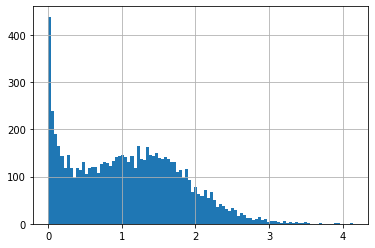

In [7]:
df['entropy_value_phi3'].hist(bins=100)

In [8]:
df['norm_entropy'] = df['entropy_value_phi3'] / df['entropy_value_phi3'].max()

<ipython-input-8-42a607bb354a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_entropy'] = df['entropy_value_phi3'] / df['entropy_value_phi3'].max()


In [9]:
df['norm_entropy'].describe().round(5)

count    7523.00000
mean        0.26123
std         0.17636
min         0.00027
25%         0.10937
50%         0.25673
75%         0.38860
max         1.00000
Name: norm_entropy, dtype: float64

In [10]:

train_valid_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
test_df.to_csv("test_combined_entr.tsv", sep="\t", index=False)
print(f"Тестовый датасет: {len(test_df)} примеров сохранён в 'test.tsv'.")

train_valid_df = train_valid_df.sort_values(by="norm_entropy", ascending=False)
N = len(train_valid_df)
print(f"Всего обучающих+валидационных примеров: {N}")

def split_and_save_data(
    df,
    complexity_col='norm_entropy',
    thresholds=[(None, 0.10937, 'easy'), (0.10937, 0.38860, 'middle'), (0.38860, None, 'hard')],
    test_size=0.1,
    random_state=42,
    output_prefix=""
    ):

    for lower, upper, suffix in thresholds:
        if lower is None:
            filtered = df[(df[complexity_col] < upper)].sample(1000,random_state=42)
        elif upper is None:
            filtered = df[(df[complexity_col] >= lower)].sample(1000,random_state=42)
        else:
            filtered = df[(df[complexity_col] >= lower)].sample(1000,random_state=42)
        
        filtered = filtered.reset_index(drop=True)
        
        train, valid = train_test_split(filtered, test_size=test_size, random_state=random_state)
        
        train.to_csv(f"{output_prefix}train_df_{suffix}.tsv", sep='\t', index=False)
        valid.to_csv(f"{output_prefix}valid_df_{suffix}.tsv", sep='\t', index=False)

split_and_save_data(train_valid_df, complexity_col='norm_entropy',output_prefix='')

Тестовый датасет: 753 примеров сохранён в 'test.tsv'.
Всего обучающих+валидационных примеров: 6770


In [11]:
test = pd.read_csv("test_combined_entr.tsv", sep="\t").dropna(subset='norm_entropy')
test.loc[(test['norm_entropy'] < 0.10937), 'CLASS'] = 'easy'
test.loc[(test['norm_entropy'] >=0.38860), 'CLASS'] = 'hard'
test.loc[(test['norm_entropy'] >=0.10937) & (test['norm_entropy'] < 0.38860), 'CLASS'] = 'middle'
print(test['CLASS'].value_counts())

class_count = test['CLASS'].value_counts()
min_count =class_count.min()
balanced_dfs = []
for classe in test['CLASS'].dropna().unique():
    class_df = test[test['CLASS'] == classe]
    sampled_class_df = class_df.sample(n=min_count,random_state=42)
    balanced_dfs.append(sampled_class_df)
    
balanced_df = pd.concat(balanced_dfs)
balanced_df.to_csv("test_balanced_combined_entr.tsv", sep="\t", index=False)
    

CLASS
middle    377
hard      190
easy      186
Name: count, dtype: int64


In [12]:
random_train_valid_df = train_valid_df.sample(1000,random_state=42)
train, valid = train_test_split(random_train_valid_df, test_size=0.1, random_state=42)

In [13]:
train.to_csv(f"train_df_random.tsv", sep='\t', index=False)
valid.to_csv(f"valid_df_random.tsv", sep='\t', index=False)